Dataset downloaded from: https://www.kaggle.com/rishidamarla/amazoncom-fashion-products  
The dataset covers 10000 products listings from Amazon UK created by PromptCloud's in-house web-crawling service. A bigger dataset (more than 7 million fashion products) can be downloaded here: https://data.world/promptcloud/fashion-products-on-amazon-com. I used the free sample dataset as original data source, and programmed some functions to help current or potential sellers on Amazon UK. Core Functions are as follow:  
1. A list of Unique Values for selected column (a reference for further analysis)
2. by Category: What's the average review rating and price? 
3. by Category: What's the top N highest review products?  
4. by Category: What's the price distribution look like? Also some data visualization.  
5. by Manufacturer: What products are each of them selling?
6. Export the CSV files after Text Cleaning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

sns.set_style('whitegrid')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth',200)

In [2]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 66e3805b8cabe977f40c05259cc3fcf7ead5687d
python           : 3.8.8.final.0
python-bits      : 64
OS               : Darwin
OS-release       : 20.6.0
Version          : Darwin Kernel Version 20.6.0: Mon Aug 30 06:12:21 PDT 2021; root:xnu-7195.141.6~3/RELEASE_X86_64
machine          : x86_64
processor        : i386
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.3.5
numpy            : 1.20.1
pytz             : 2021.1
dateutil         : 2.8.1
pip              : 21.0.1
setuptools       : 52.0.0.post20210125
Cython           : 0.29.23
pytest           : 6.2.3
hypothesis       : None
sphinx           : 4.0.1
blosc            : None
feather          : None
xlsxwriter       : 1.3.8
lxml.etree       : 4.6.3
html5lib         : 1.1
pymysql          : 1.0.2
psycopg2         : None
jinja2           : 2.11.3
IPython          : 7.22.0
pandas_datareader: None
b

In [3]:
cwd = os.getcwd()
cwd
print(cwd+'/amazon_co-ecommerce_sample.csv')

/Users/ameliahzw/Desktop/ModernDataStructure/Huang_Zhiwen/Final_Project/amazon_co-ecommerce_sample.csv


# Load Data and Data Pre-processing

In [4]:
df = pd.read_csv(cwd+'/amazon_co-ecommerce_sample.csv')
    
df_t = pd.DataFrame()
df_cat = df['amazon_category_and_sub_category'].str.split('>',expand = True)
for i in range(0,5):
    temp = df_cat[i].str.strip()
    df_t = pd.concat([df_t, temp], axis = 1)
    i = i+1
df_t.columns = ['cat1','cat2','cat3','cat4','cat5']
    
df['average_review_rating'] = df['average_review_rating'].apply(str)

df_star = df['average_review_rating'].str.split('out of',expand = True)[0].astype(float)
df_star = pd.DataFrame(df_star.rename('avg_rating', inplace = True))

df_price = df['price'].str.split('£',expand = True)[1].str.split('-',expand = True)[0].str.replace(',', '').astype(float)
df_price = pd.DataFrame(df_price.rename('p', inplace = True))

df_all = pd.concat([df, df_t, df_star, df_price], axis = 1)
    

In [5]:
#Not really meaningful so that I deleted 
"""
df_buy_after_viewing = df['items_customers_buy_after_viewing_this_item'].str.split('|')
df_buy_after_viewing.head(5)
"""

"\ndf_buy_after_viewing = df['items_customers_buy_after_viewing_this_item'].str.split('|')\ndf_buy_after_viewing.head(5)\n"

# 1. Average Review Rating/Price by Subcategory

In [6]:
def category_avg_metric(metric, cat1 = 'cat1', cat2 = 'cat2'):
    if metric == 'rating':
        df_cam = df_all['avg_rating'].groupby([df_all[cat1],df_all[cat2]]).mean()      
    if metric == 'price':
        df_cam = df_all['p'].groupby([df_all[cat1],df_all[cat2]]).mean()      
    return df_cam
    

In [7]:
category_avg_metric(metric = 'rating')

cat1                              cat2                                     
Arts & Crafts                     Art & Craft Supplies                         5.000000
                                  Art Sand                                     4.652174
                                  Blackboards                                  4.673333
                                  Children's Chalk                             4.433333
                                  Children's Craft Kits                        4.696956
                                  Colouring Pencils                            4.600000
                                  Colouring Pens & Markers                     4.649333
                                  Doll Making                                  4.500000
                                  Drawing & Painting Supplies                  4.500000
                                  Felt Kits                                    4.300000
                                  Painting B

# 2. Top n Highest Review Products for Selected Category 3

In [8]:
def top_n_highest_review(n, cat3 = 'Rail Vehicles'):
    assert n > 0, "n must be non-negative"
    df_cat3 = df_all[df_all['cat3']==cat3]
    df_cat3_top_n = df_cat3.sort_values(by = 'avg_rating', ascending = False).head(n)
    df_product = df_cat3_top_n[['product_name', 'product_information','product_description'
                         ,'price','average_review_rating', 'customers_who_bought_this_item_also_bought'
                        , 'items_customers_buy_after_viewing_this_item']]
    return df_product
    

In [9]:
top_n_highest_review(0)

AssertionError: n must be non-negative

# 3. What product does each manufacture sell?

In [10]:
def manufacturer_product(manufacturer = 'LEGO'):
    df_m = df_all[df_all['manufacturer']==manufacturer]
    df_m_p = df_m[['manufacturer', 'product_name','price', 'number_available_in_stock'
                  ,'number_of_reviews','average_review_rating', 'amazon_category_and_sub_category'
                  ,'product_information', 'product_description'
                   ,'customers_who_bought_this_item_also_bought','items_customers_buy_after_viewing_this_item']]
    return df_m_p

In [11]:
manufacturer_product('LEGO')

,manufacturer,product_name,price,number_available_in_stock,number_of_reviews,average_review_rating,amazon_category_and_sub_category,product_information,product_description,customers_who_bought_this_item_also_bought,items_customers_buy_after_viewing_this_item
614,LEGO,Lego City 2824: Advent Calendar 2010,£43.87,19 new,40,4.7 out of 5 stars,NaN,Technical Details Item Weight440 g Product Dimensions39 x 26 x 7.2 cm Manufacturer recommended age:5 - 12 years Item model number2824 Number of Puzzle Pieces271 Assembly RequiredYes Batteries Incl...,"The holidays are coming to LEGO City, one gift at a time! Unwrap an adventure during the first 24 days of December! Countdown to the holidays with a new LEGO City minifigure, vehicle or accessory ...",http://www.amazon.co.uk/LEGO-City-60099-Advent-Calendar/dp/B00SDTYX2Q | http://www.amazon.co.uk/LEGO-City-7687-Advent-Calendar/dp/B001U3ZMRC | http://www.amazon.co.uk/LEGO-City-60024-Advent-Calend...,http://www.amazon.co.uk/LEGO-City-60099-Advent-Calendar/dp/B00SDTYX2Q | http://www.amazon.co.uk/LEGO-Star-Wars-75097-Calendar/dp/B00SDTU3C0 | http://www.amazon.co.uk/LEGO-Friends-41102-Advent-Cale...
626,LEGO,LEGO Friends 41016: Advent Calendar,£24.95,19 new,87,4.5 out of 5 stars,NaN,Technical Details Item Weight218 g Product Dimensions38.2 x 7.1 x 26.2 cm Manufacturer recommended age:5 - 12 years Item model number6024542 Main Language(s)English Number of Puzzle Pieces213 Asse...,"Product Description LEGO Friends Advent Calendar features 24 gifts, each enclosed in its own compartment in a LEGO Friends holiday-themed calendar. Includes Stephanie and Lily mini-doll figures. F...",http://www.amazon.co.uk/LEGO-Friends-41040-Advent-Calendar/dp/B00I4IXUCA | http://www.amazon.co.uk/DryNites-Pyjama-Pants-Girls-27-57/dp/B00FAQEI70 | http://www.amazon.co.uk/LEGO-City-60024-Advent-...,http://www.amazon.co.uk/LEGO-Friends-41102-Advent-Calendar/dp/B00SDU33IU | http://www.amazon.co.uk/LEGO-City-60099-Advent-Calendar/dp/B00SDTYX2Q | http://www.amazon.co.uk/LEGO-Friends-41040-Advent...
627,LEGO,LEGO Star Wars 75018: Jek-14's Stealth Starfighter,£68.87,16 new,30,4.8 out of 5 stars,Characters & Brands > Star Wars > Toys,Technical Details Item Weight907 g Product Dimensions48 x 28.2 x 6.1 cm Manufacturer recommended age:8 - 14 years Item model number6025085 Main Language(s)English Number of Puzzle Pieces550 Assemb...,"Product Description LEGO® Star Wars™ Jek-14’s [TM] Stealth Starfighter features retractable landing gear, opening cockpit with space for a minifigure, folding wings, rotating and elevating blaster...",http://www.amazon.co.uk/LEGO-Star-Wars-75004-Headhunter | http://www.amazon.co.uk/LEGO-Star-Wars-9497-Striker-Class/dp/B006ZS4WIM | http://www.amazon.co.uk/LEGO-Star-Wars-75051-Fighter/dp/B00I4IYR...,http://www.amazon.co.uk/Star-Wars-75102-Fighter/dp/B00SDTTJLQ | http://www.amazon.co.uk/75094-Star-Wars-Imperial-Tydirium/dp/B00SDTU3Z2 | http://www.amazon.co.uk/LEGO-Star-Wars-75104-Command/dp/B0...
634,LEGO,LEGO City 7687 Advent Calendar 2009,£24.99,17 new,45,4.8 out of 5 stars,NaN,Technical Details Item Weight399 g Product Dimensions39 x 25.8 x 7.2 cm Manufacturer recommended age:5 - 12 years Item model number190811 Assembly RequiredNo Batteries Required?No Batteries Includ...,Manufacturer's Description 24 days of LEGO® City building fun! This advent calendar has nine minifigures included and many other cool accessories that make your LEGO City even more exciting.,http://www.amazon.co.uk/LEGO-City-60099-Advent-Calendar/dp/B00SDTYX2Q | http://www.amazon.co.uk/Play-Doh-B2199-Advent-Calendar/dp/B00R9DBK9Q | http://www.amazon.co.uk/LEGO-Star-Wars-75097-Calendar...,http://www.amazon.co.uk/LEGO-City-60099-Advent-Calendar/dp/B00SDTYX2Q | http://www.amazon.co.uk/LEGO-Star-Wars-75097-Calendar/dp/B00SDTU3C0 | http://www.amazon.co.uk/Playmobil-5494-Christmas-Calen...
651,LEGO,LEGO Star Wars 75015: Corporate Alliance Tank Droid,£39.99,21 new,34,4.8 out of 5 stars,Characters & Brands > Star Wars > Toys,Technical Details

# 4. Price Distribution for Each Category

In [12]:
def price_dist(cat2):
    assert cat2 in df_all['cat2'].unique(), "The Category 2 you input does not exist. Please check!"
    df_category = df_all[df_all['cat2'] == cat2]
    print(f'Summary Statistics for Category 2: {cat2} Price')
    print(df_category.p.describe())
    
    p_mean = df_category.p.mean()
    
    fig,ax = plt.subplots(1,1,figsize=(12,6))
    df_category.p.hist( ax = ax, bins='auto', color = 'cornflowerblue')
    ax.set_xlabel('price in £')
    ax.set_ylabel('frequency')
    ax.set_title(f'Price Distribution for Category 2: {cat2}')
    ax.axvline(df_category.p.mean(),color='navy')
    ax.text(df_category.p.mean()+1,ax.get_ylim()[1]*.75,f'mean = {p_mean:0.2f}')
    plt.show()

Summary Statistics for Category 2: Thomas & Friends Price
count     5.00000
mean     14.59200
std       7.23547
min       5.99000
25%       9.99000
50%      14.99000
75%      16.99000
max      25.00000
Name: p, dtype: float64


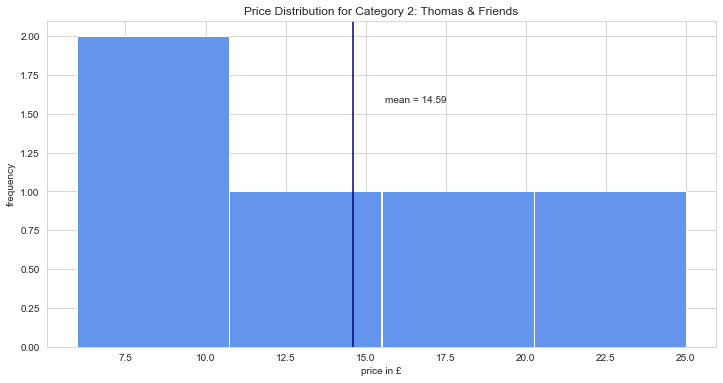

In [13]:
price_dist('Thomas & Friends')

In [14]:
'Thomas & Friend' in df_all['cat2'].unique()

False

# 5. Export the Text-Cleaning CSV File 

In [15]:
def export(path = cwd):
    df_all.to_csv('Amazon_UK_FashionProduct.csv')

In [16]:
export()

# 6. Get Unique Value for Selected Column

In [17]:
def value_list(column = 'cat3'):
    assert column in [column for column in df_all], "Check the column name you entered."
    for m in df_all[column].unique():
        print(m)

In [18]:
def column_names():
    return [column for column in df_all]

In [19]:
column_names()

['uniq_id',
 'product_name',
 'manufacturer',
 'price',
 'number_available_in_stock',
 'number_of_reviews',
 'number_of_answered_questions',
 'average_review_rating',
 'amazon_category_and_sub_category',
 'customers_who_bought_this_item_also_bought',
 'description',
 'product_information',
 'product_description',
 'items_customers_buy_after_viewing_this_item',
 'customer_questions_and_answers',
 'customer_reviews',
 'sellers',
 'cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'avg_rating',
 'p']

# 7. Some Tests

## 1. Add assert to category_avg_metric

In [ ]:
def category_avg_metric(metric, cat1 = 'cat1', cat2 = 'cat2'):
    assert metric in ['rating', 'price'], "Please input 'rating' or 'price' "
    for category in [cat1, cat2]:  
        assert category in ['cat1','cat2', 'cat3', 'cat4','cat5'], "The index of Category should be between 1 and 5"
    if metric == 'rating':
        df_cam = df_all['avg_rating'].groupby([df_all[cat1],df_all[cat2]]).mean()      
    if metric == 'price':
        df_cam = df_all['p'].groupby([df_all[cat1],df_all[cat2]]).mean()      
    return df_cam

## 2. test_top_n_highest_review, check the shape

In [ ]:
def test_top_n_highest_review(n, cat3 = 'Rail Vehicles'):
    df_cat3 = df_all[df_all['cat3']==cat3]
    df_cat3_top_n = df_cat3.sort_values(by = 'avg_rating', ascending = False).head(n)
    df_product = df_cat3_top_n[['product_name', 'product_information','product_description'
                         ,'price','average_review_rating', 'customers_who_bought_this_item_also_bought'
                        , 'items_customers_buy_after_viewing_this_item']]
    expected = (5,7)
    actual = df_product.shape
    assert expected == actual
    

In [ ]:
df_all.head(5).T

In [ ]:
df_all.head(5).T